In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
X = 6 * np.random.rand(100,1) - 3 
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100,1)

In [4]:
X.shape

(100, 1)

In [5]:
y.shape

(100, 1)

Text(0, 0.5, 'y dataset')

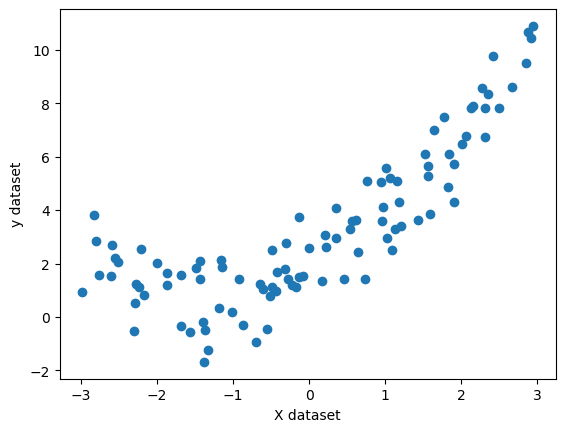

In [6]:
plt.scatter(X,y)
plt.xlabel('X dataset')
plt.ylabel('y dataset')

In [7]:
from sklearn.model_selection  import train_test_split
X_train,X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [8]:
#implement simple linear regression 

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
model.fit(X_train,y_train )

LinearRegression()

In [10]:
from sklearn.metrics import r2_score

In [11]:
score = r2_score(y_test,model.predict(X_test))

In [12]:
score

0.6790125711556817

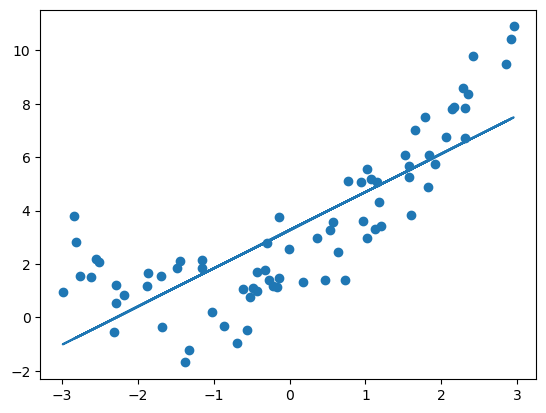

In [13]:
#visulaize the model 
plt.plot(X_train , model.predict(X_train))
plt.scatter(X_train,y_train)

#### polynomial regression 

In [14]:
from sklearn.preprocessing import PolynomialFeatures


In [15]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly= poly.transform(X_test)


In [17]:
X_train_poly.shape

(75, 3)

In [18]:
#include bias parameter
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8498382403862198


In [19]:
regression.coef_

array([[0.        , 1.48533057, 0.53385198]])

In [20]:
regression.intercept_

array([1.80141169])

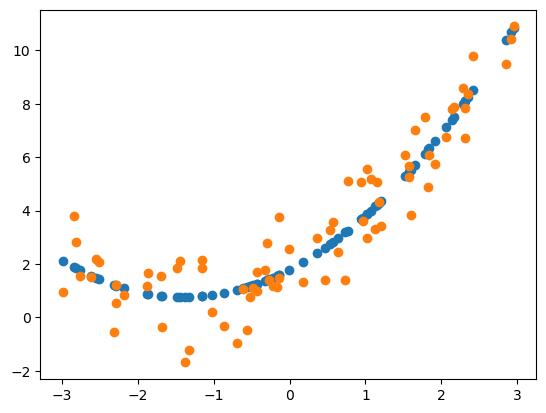

In [22]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [31]:
poly = PolynomialFeatures(degree=6,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly= poly.transform(X_test)


In [32]:
#include bias parameter
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8629385952028152


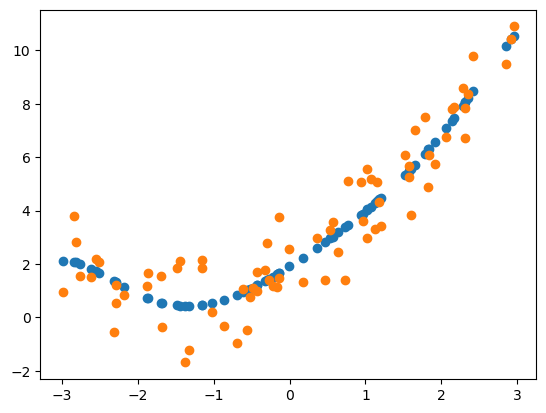

In [33]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [35]:
#prediction of new data
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)

In [37]:
X_new_poly.shape

(200, 7)

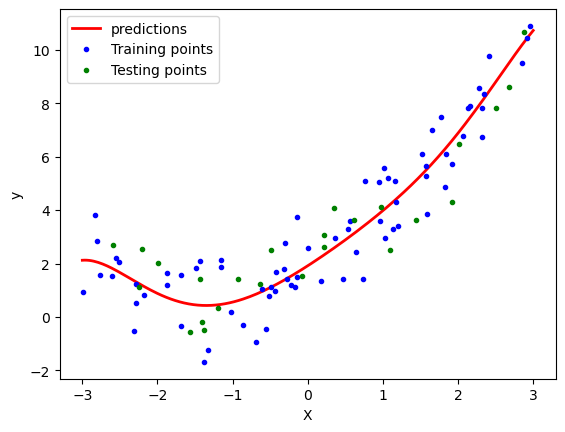

In [38]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new,y_new,"r-",linewidth=2,label="predictions")
plt.plot(X_train,y_train,"b.",label="Training points")
plt.plot(X_test,y_test,"g.",label="Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()